In [105]:
# Import main libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
# Input data paths
DIR = os.path.abspath('')
IN_FOLDER = os.path.join(os.path.dirname(DIR), "in")

BREED_LABELS = os.path.join(IN_FOLDER, "breed_labels.csv")
COLOR_LABELS = os.path.join(IN_FOLDER, "color_labels.csv")
STATE_LABELS = os.path.join(IN_FOLDER, "state_labels.csv")

In [13]:
# Store the input data to DataFrames
breed_labels = pd.read_csv(BREED_LABELS)
color_labels = pd.read_csv(COLOR_LABELS)
state_labels = pd.read_csv(STATE_LABELS)

In [14]:
# breed_labels contains the breed names for both dogs (type=1) and cats (type=2)
breed_labels.iloc[np.r_[0:2, -2:0]]

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
305,305,2,Turkish Van
306,306,2,Tuxedo


In [15]:
# color_labels are the color names with their ids.
# It is the color of the pet's coat. Each pet has at most 3 colors.
# It will be used in the train/test.csv files
color_labels

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [16]:
# state_labels are the 15 states of Malaysia
# The state where the pet is from is recorded in the train/test.csv files
state_labels

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [20]:
# Train and Test data sets
TRAIN = os.path.join(IN_FOLDER, "train", "train.csv")
TEST = os.path.join(IN_FOLDER, "test", "test.csv")

train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [134]:
for column in train:
    col = train[column]
    num_unique_values = col.nunique()

    # Column Name
    print("\nColumn Name: \t\t\t%s" % col.name)

    # Column Type + Min/Max
    if col.dtype == "int64":
        print("Min -> Max: \t\t\t%d -> %d" % (col.min(), col.max()))
    else:
        print("Column type: \t\t\t%s" % col.dtype)

    # Unique values + possible/example values
    print("Number of unique values: \t%d" % num_unique_values)
    if num_unique_values < 10:
        sorted_unique = col.unique()
        sorted_unique.sort()
        print("Possible values: \t\t%s" %
              " ".join(map(str, sorted_unique)))
    else:
        print("Example value: \t\t\t%s" % col.sample(1, axis=0).values[0])


Column Name: 			Type
Min -> Max: 			1 -> 2
Number of unique values: 	2
Possible values: 		1 2

Column Name: 			Name
Column type: 			object
Number of unique values: 	9060
Example value: 			OPIE

Column Name: 			Age
Min -> Max: 			0 -> 255
Number of unique values: 	106
Example value: 			2

Column Name: 			Breed1
Min -> Max: 			0 -> 307
Number of unique values: 	176
Example value: 			264

Column Name: 			Breed2
Min -> Max: 			0 -> 307
Number of unique values: 	135
Example value: 			0

Column Name: 			Gender
Min -> Max: 			1 -> 3
Number of unique values: 	3
Possible values: 		1 2 3

Column Name: 			Color1
Min -> Max: 			1 -> 7
Number of unique values: 	7
Possible values: 		1 2 3 4 5 6 7

Column Name: 			Color2
Min -> Max: 			0 -> 7
Number of unique values: 	7
Possible values: 		0 2 3 4 5 6 7

Column Name: 			Color3
Min -> Max: 			0 -> 7
Number of unique values: 	6
Possible values: 		0 3 4 5 6 7

Column Name: 			MaturitySize
Min -> Max: 			1 -> 4
Number of unique values: 	4
Possible values

## Visualization
- Let's have a look have a look at which states have the most pets.

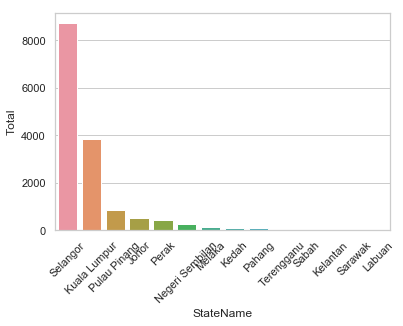

In [135]:
groupbyState = train[["State", "Type"]].groupby(["State"]).count().reset_index()
total_df = pd.merge(left=groupbyState, right=state_labels, how='left', left_on='State', right_on='StateID')
data = total_df[["Type", "StateName"]].rename(index=str, columns={ "Type": "Total" })

sns.set(style="whitegrid")
ax = sns.barplot(x="StateName", y="Total", data=data.sort_values(by=['Total'], ascending=False))
for item in ax.get_xticklabels():
    item.set_rotation(45)

This is in accordance with the size of the state, in terms of number of inhabitants.